In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\aishw\OneDrive\Desktop\shopping_behavior_updated.csv"  # Ensure correct path
df = pd.read_csv(file_path)
print("🔹 Initial Dataset Info:")
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print("Column Names:", df.columns.tolist())
print("\n Finding Missing Values Preprocessing:")
print(df.isnull().sum())
print(df.dtypes)


🔹 Initial Dataset Info:
Total Rows: 3900
Total Columns: 18
Column Names: ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']

 Finding Missing Values Preprocessing:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64
Customer ID                 int64
Age                         int64
Gender       

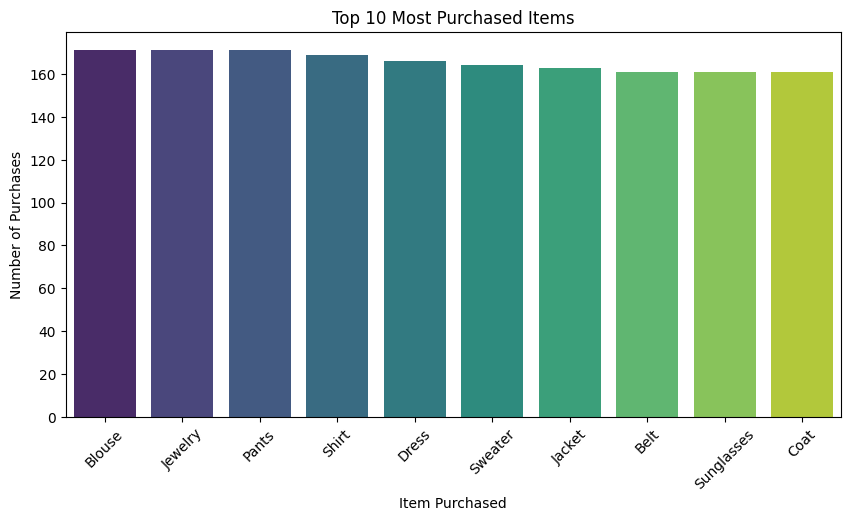

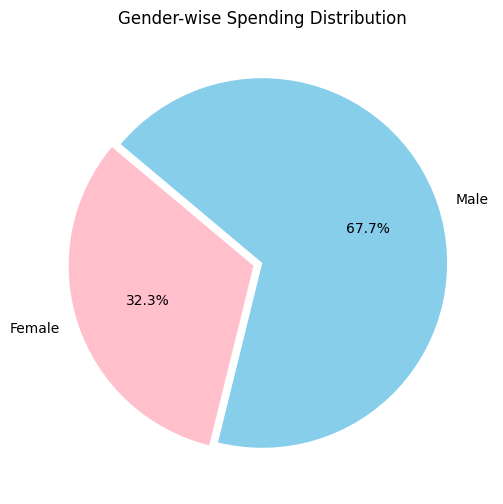

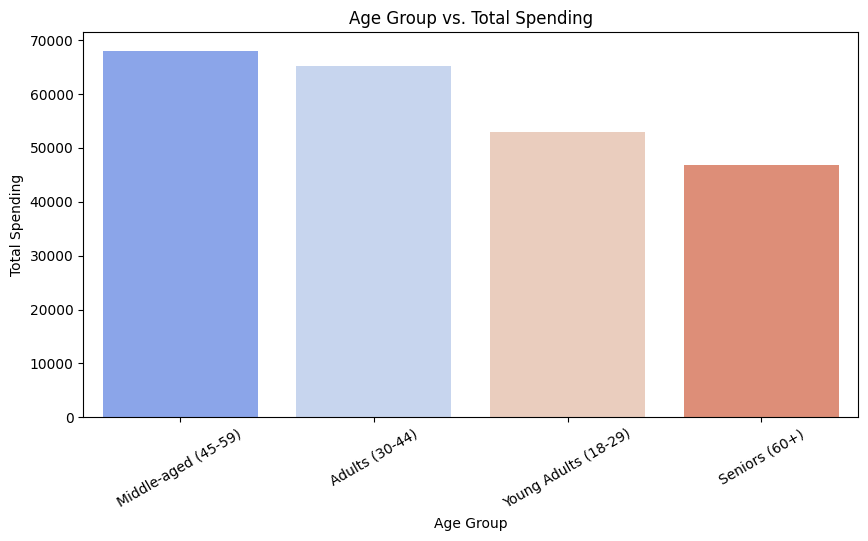

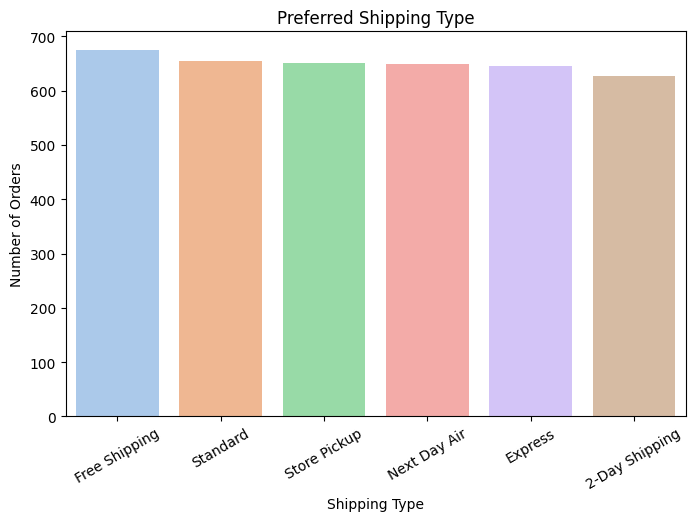

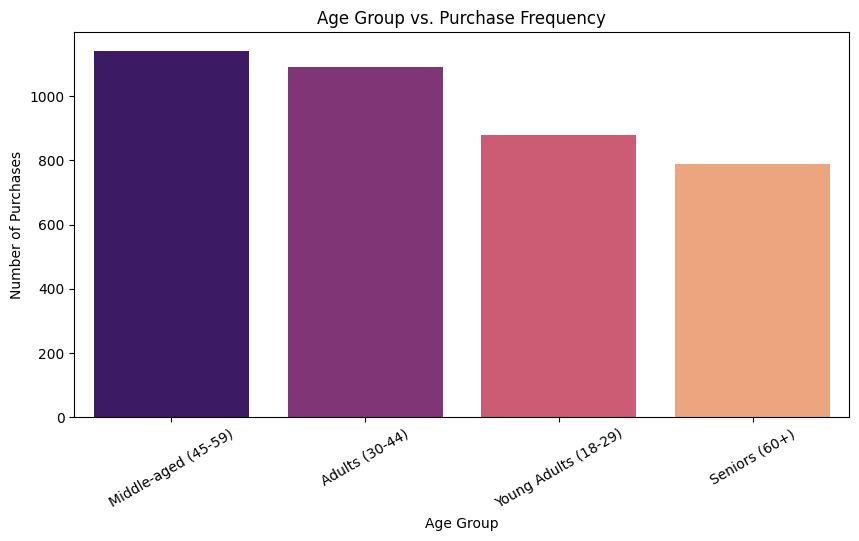

🛍️ The age group that spends the most: **Middle-aged (45-59)**
🛒 The age group with the highest purchase frequency: **Middle-aged (45-59)**
💰 **Most Valuable Age Group (Highest Spending & Frequency): Middle-aged (45-59)**


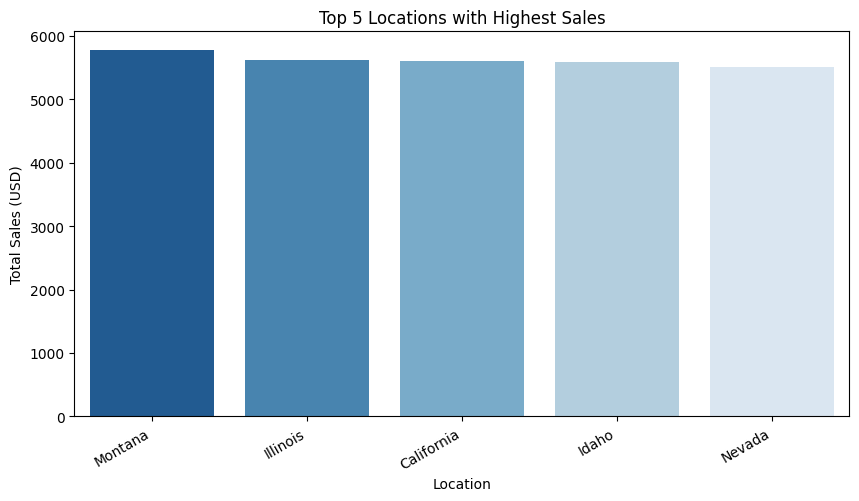

🏆 **Top 3 Locations with Highest Sales:**
Location
Montana       5784
Illinois      5617
California    5605
Name: Purchase Amount (USD), dtype: int64
Total Subscribed Customers: 1053


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\aishw\OneDrive\Desktop\shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

most_purchased_items = df['Item Purchased'].value_counts().head(10)

gender_spending = df.groupby('Gender')['Purchase Amount (USD)'].sum()

def classify_age(age):
    if age < 18:
        return "Teen (Under 18)"
    elif 18 <= age < 30:
        return "Young Adults (18-29)"
    elif 30 <= age < 45:
        return "Adults (30-44)"
    elif 45 <= age < 60:
        return "Middle-aged (45-59)"
    else:
        return "Seniors (60+)"

df['Age Group'] = df['Age'].apply(classify_age)

age_group_spending = df.groupby('Age Group')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=most_purchased_items.index, y=most_purchased_items.values, hue=most_purchased_items.index, palette="viridis", legend=False)
plt.xlabel("Item Purchased")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(6, 6))
plt.pie(gender_spending, labels=gender_spending.index, autopct='%1.1f%%', colors=["pink", "skyblue"], startangle=140, explode=(0.05, 0))
plt.title("Gender-wise Spending Distribution")
plt.show()
plt.figure(figsize=(10, 5))
sns.barplot(x=age_group_spending.index, y=age_group_spending.values, hue=age_group_spending.index, palette="coolwarm", legend=False)
plt.xlabel("Age Group")
plt.ylabel("Total Spending")
plt.title("Age Group vs. Total Spending")
plt.xticks(rotation=30)
plt.show()

preferred_shipping = df['Shipping Type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=preferred_shipping.index, y=preferred_shipping.values, hue=preferred_shipping.index, palette="pastel", legend=False)
plt.xlabel("Shipping Type")
plt.ylabel("Number of Orders")
plt.title("Preferred Shipping Type")
plt.xticks(rotation=30)
plt.show()
def classify_age(age):
    if age < 18:
        return "Teen (Under 18)"
    elif 18 <= age < 30:
        return "Young Adults (18-29)"
    elif 30 <= age < 45:
        return "Adults (30-44)"
    elif 45 <= age < 60:
        return "Middle-aged (45-59)"
    else:
        return "Seniors (60+)"

df['Age Group'] = df['Age'].apply(classify_age)

age_group_spending = df.groupby('Age Group')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

age_group_frequency = df['Age Group'].value_counts()

age_group_analysis = pd.DataFrame({
    "Total Spending (USD)": age_group_spending,
    "Purchase Frequency": age_group_frequency
}).sort_values(by=["Total Spending (USD)", "Purchase Frequency"], ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=age_group_frequency.index, y=age_group_frequency.values, hue=age_group_frequency.index, palette="magma", legend=False)
plt.xlabel("Age Group")
plt.ylabel("Number of Purchases")
plt.title("Age Group vs. Purchase Frequency")
plt.xticks(rotation=30)
plt.show()

top_spending_age_group = age_group_spending.idxmax()
top_frequency_age_group = age_group_frequency.idxmax()

print(f"🛍️ The age group that spends the most: **{top_spending_age_group}**")
print(f"🛒 The age group with the highest purchase frequency: **{top_frequency_age_group}**")

most_valuable_age_group = age_group_analysis.idxmax()
print(f"💰 **Most Valuable Age Group (Highest Spending & Frequency): {most_valuable_age_group['Total Spending (USD)']}**")

location_sales = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

top_locations = location_sales.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.index, y=top_locations.values, hue=top_locations.index, palette="Blues_r", legend=False)
plt.xlabel("Location")
plt.ylabel("Total Sales (USD)")
plt.title("Top 5 Locations with Highest Sales")
plt.xticks(rotation=30, ha='right')
plt.show()
print(f"🏆 **Top 3 Locations with Highest Sales:**")
print(top_locations.head(3))


total_subscribers = df['Subscription Status'].value_counts().get('Yes', 0)
total_unsubscribers = df['Subscription Status'].value_counts().get('No', 0)
age_group_subscriptions = df[df['Subscription Status'] == 'Yes'].groupby('Age Group')['Customer ID'].count().sort_values(ascending=False)

gender_subscriptions = df[df['Subscription Status'] == 'Yes'].groupby('Gender')['Customer ID'].count().sort_values(ascending=False)

print(f"Total Subscribed Customers: {total_subscribers}")



In [14]:

highest_spending = df['Purchase Amount (USD)'].max()
lowest_spending = df['Purchase Amount (USD)'].min()
average_spending = df['Purchase Amount (USD)'].mean()

print(f"💰 **Highest Purchase Amount:** ${highest_spending:.2f}")
print(f"💵 **Lowest Purchase Amount:** ${lowest_spending:.2f}")
print(f"📊 **Average Purchase Amount:** ${average_spending:.2f}")

df['Spending Category'] = df['Purchase Amount (USD)'].apply(lambda x: 'High Spending' if x > average_spending else 'Low Spending')

spending_distribution = df['Spending Category'].value_counts()
print("\n🛍️ **Customer Spending Distribution:**")
print(spending_distribution)


💰 **Highest Purchase Amount:** $100.00
💵 **Lowest Purchase Amount:** $20.00
📊 **Average Purchase Amount:** $59.76

🛍️ **Customer Spending Distribution:**
Spending Category
High Spending    1963
Low Spending     1937
Name: count, dtype: int64


Total Customers Matching Criteria: 1460
Filtered Data Saved to: C:\Users\aishw\OneDrive\Desktop\High_Value_Non_Subscribers.xlsx
Total High-Value Non-Subscribed Customers: 1460
Customers Likely to Convert (High Review Rating): 1132
Estimated Conversion Rate: 77.53%


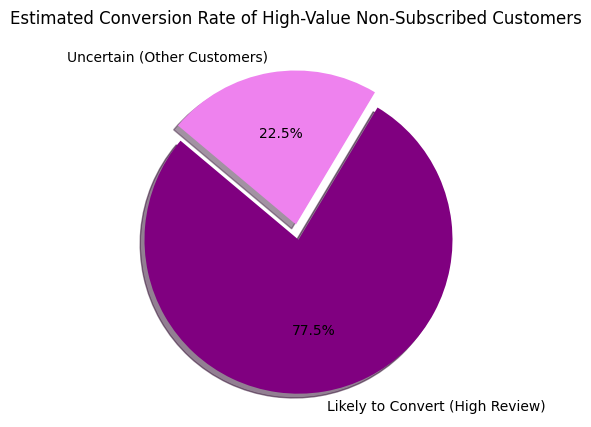

In [64]:
import pandas as pd

# ✅ Load Dataset
file_path = r"C:\Users\aishw\OneDrive\Desktop\shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

# ✅ Convert Purchase Frequency to Numeric
def frequency_to_numeric(freq):
    mapping = {
        "Weekly": 52, "Bi-Weekly": 26, "Fortnightly": 26, 
        "Monthly": 12, "Every 3 Months": 4, "Quarterly": 4, 
        "Annually": 1
    }
    return mapping.get(freq, 0)

df["Numeric Purchase Frequency"] = df["Frequency of Purchases"].apply(frequency_to_numeric)

# ✅ Define Filtering Conditions
high_spending_threshold = 25  
high_frequency_threshold = 6  

high_value_customers = df[
    (df["Purchase Amount (USD)"] > high_spending_threshold) &  
    (df["Numeric Purchase Frequency"] > high_frequency_threshold) &  
    (df["Subscription Status"].str.lower() == "no")  
]

print(f"Total Customers Matching Criteria: {high_value_customers['Customer ID'].nunique()}")

output_file = r"C:\Users\aishw\OneDrive\Desktop\High_Value_Non_Subscribers.xlsx"
high_value_customers.to_excel(output_file, index=False)

print(f"Filtered Data Saved to: {output_file}")

high_review_customers = high_value_non_subscribed[high_value_non_subscribed["Review Rating"] > 3.0]
low_review_customers = high_value_non_subscribed[high_value_non_subscribed["Review Rating"] < 3.0]

total_high_value_non_subscribed = high_value_non_subscribed["Customer ID"].nunique()
high_review_count = high_review_customers["Customer ID"].nunique()
conversion_rate = (high_review_count / total_high_value_non_subscribed) * 100 if total_high_value_non_subscribed > 0 else 0
print(f"Total High-Value Non-Subscribed Customers: {total_high_value_non_subscribed}")
print(f"Customers Likely to Convert (High Review Rating): {high_review_count}")
print(f"Estimated Conversion Rate: {conversion_rate:.2f}%")

labels = ["Likely to Convert (High Review)", "Uncertain (Other Customers)"]
sizes = [high_review_count, total_high_value_non_subscribed - high_review_count]
colors = ['purple', 'violet']
explode = (0.1, 0)

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=140)
plt.title("Estimated Conversion Rate of High-Value Non-Subscribed Customers")
plt.show()



In [15]:
import pandas as pd

file_path = r"C:\Users\aishw\OneDrive\Desktop\shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

def frequency_to_numeric(freq):
    mapping = {
        "Weekly": 52, "Bi-Weekly": 26, "Fortnightly": 26, 
        "Monthly": 12, "Every 3 Months": 4, "Quarterly": 4, 
        "Annually": 1
    }
    return mapping.get(freq, 0)

df["Numeric Purchase Frequency"] = df["Frequency of Purchases"].apply(frequency_to_numeric)


low_spending_threshold = 25  
low_frequency_threshold = 12  
low_spending_subscribed_customers = df[
    (df["Purchase Amount (USD)"] < low_spending_threshold) &  
    (df["Numeric Purchase Frequency"] < low_frequency_threshold) &  
    (df["Subscription Status"].fillna("No").str.lower() == "yes")  
]

total_customers = df["Customer ID"].nunique()
low_spending_subscribed_count = low_spending_subscribed_customers["Customer ID"].nunique()

if total_customers > 0:
    percentage = (low_spending_subscribed_count / total_customers) * 100
else:
    percentage = 0

print(f"Total Customers Matching Criteria: {low_spending_subscribed_count}")
print(f"Percentage of Low-Spending Subscribed Customers: {percentage:.2f}%")

output_file = r"C:\Users\aishw\OneDrive\Desktop\Low_Spending_Subscribers.xlsx"
low_spending_subscribed_customers.to_excel(output_file, index=False)

print(f"Filtered Data Saved to: {output_file}")


Total Customers Matching Criteria: 26
Percentage of Low-Spending Subscribed Customers: 0.67%
Filtered Data Saved to: C:\Users\aishw\OneDrive\Desktop\Low_Spending_Subscribers.xlsx


Total Customers Matching Criteria: 26
Percentage of Low-Spending Subscribed Customers: 0.67%
Filtered Data Saved to: C:\Users\aishw\OneDrive\Desktop\Low_Spending_Subscribers.xlsx


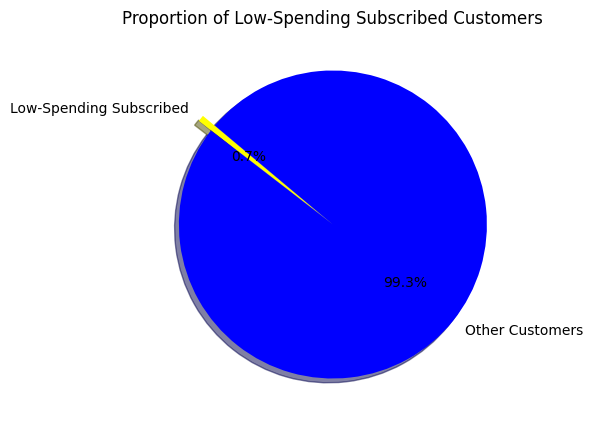

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = r"C:\Users\aishw\OneDrive\Desktop\shopping_behavior_updated.csv"
df = pd.read_csv(file_path)
def frequency_to_numeric(freq):
    mapping = {
        "Weekly": 52, "Bi-Weekly": 26, "Fortnightly": 26, 
        "Monthly": 12, "Every 3 Months": 4, "Quarterly": 4, 
        "Annually": 1
    }
    return mapping.get(freq, 0)

df["Numeric Purchase Frequency"] = df["Frequency of Purchases"].apply(frequency_to_numeric)

low_spending_threshold = 25  # Spending < $25
low_frequency_threshold = 12  # Purchase < 12 times a year

low_spending_subscribed_customers = df[
    (df["Purchase Amount (USD)"] < low_spending_threshold) &  
    (df["Numeric Purchase Frequency"] < low_frequency_threshold) &  
    (df["Subscription Status"].fillna("No").str.lower() == "yes")  
]

total_customers = df["Customer ID"].nunique()
low_spending_subscribed_count = low_spending_subscribed_customers["Customer ID"].nunique()

if total_customers > 0:
    percentage = (low_spending_subscribed_count / total_customers) * 100
else:
    percentage = 0

print(f"Total Customers Matching Criteria: {low_spending_subscribed_count}")
print(f"Percentage of Low-Spending Subscribed Customers: {percentage:.2f}%")

output_file = r"C:\Users\aishw\OneDrive\Desktop\Low_Spending_Subscribers.xlsx"
low_spending_subscribed_customers.to_excel(output_file, index=False)
print(f"Filtered Data Saved to: {output_file}")

labels = ["Low-Spending Subscribed", "Other Customers"]
sizes = [low_spending_subscribed_count, total_customers - low_spending_subscribed_count]
colors = ['yellow', 'blue']
explode = (0.1, 0)  

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=140)
plt.title("Proportion of Low-Spending Subscribed Customers")
plt.show()


Total Subscribed Customers: 1053
Total Unsubscribed Customers: 2847
Total High-Value Non-Subscribed Customers (Actual): 1460
Filtered Data Saved to: C:\Users\aishw\OneDrive\Desktop\Actual_High_Value_Non_Subscribers.xlsx


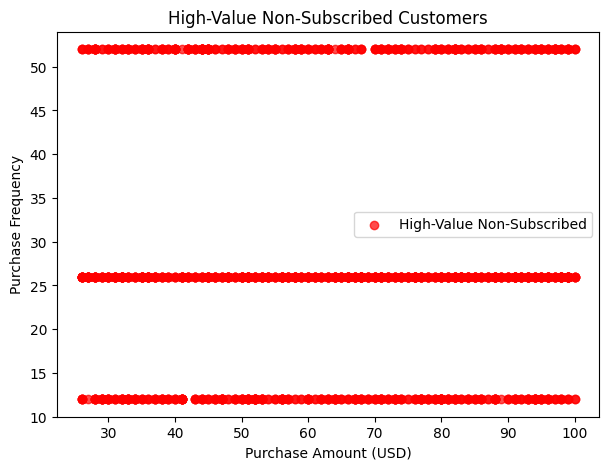

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Load Dataset
file_path = r"C:\Users\aishw\OneDrive\Desktop\shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

# ✅ Convert Purchase Frequency to Numeric
def frequency_to_numeric(freq):
    mapping = {
        "Weekly": 52, "Bi-Weekly": 26, "Fortnightly": 26, 
        "Monthly": 12, "Every 3 Months": 4, "Quarterly": 4, 
        "Annually": 1
    }
    return mapping.get(freq, 0)

df["Numeric Purchase Frequency"] = df["Frequency of Purchases"].apply(frequency_to_numeric)

# ✅ Convert Subscription Status to Numeric
df["Subscription Status"] = df["Subscription Status"].str.lower().map({"yes": 1, "no": 0})

# ✅ Calculate Total Subscribed & Unsubscribed Customers
total_subscribed = df[df["Subscription Status"] == 1]["Customer ID"].nunique()
total_unsubscribed = df[df["Subscription Status"] == 0]["Customer ID"].nunique()

print(f"Total Subscribed Customers: {total_subscribed}")
print(f"Total Unsubscribed Customers: {total_unsubscribed}")

# ✅ Define High-Value Non-Subscribed Criteria
high_spending_threshold = 25
high_frequency_threshold = 6

# ✅ Identify High-Value Non-Subscribed Customers (Actual Ground Truth)
high_value_non_subscribed_actual = df[
    (df["Purchase Amount (USD)"] > high_spending_threshold) &  
    (df["Numeric Purchase Frequency"] > high_frequency_threshold) &  
    (df["Subscription Status"] == 0)
]

total_actual_high_value_unsubscribed = high_value_non_subscribed_actual["Customer ID"].nunique()
print(f"Total High-Value Non-Subscribed Customers (Actual): {total_actual_high_value_unsubscribed}")

# ✅ Save Only Actual High-Value Non-Subscribed Customers to Excel
output_file = r"C:\Users\aishw\OneDrive\Desktop\Actual_High_Value_Non_Subscribers.xlsx"
high_value_non_subscribed_actual.to_excel(output_file, index=False)

print(f"Filtered Data Saved to: {output_file}")

# ✅ Visualization: Scatter Plot of High-Value Non-Subscribed Customers
plt.figure(figsize=(7, 5))
plt.scatter(
    high_value_non_subscribed_actual["Purchase Amount (USD)"], 
    high_value_non_subscribed_actual["Numeric Purchase Frequency"], 
    color='red', marker='o', alpha=0.7, label="High-Value Non-Subscribed"
)
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Purchase Frequency")
plt.title("High-Value Non-Subscribed Customers")
plt.legend()
plt.show()


Model Accuracy: 100.00%

Confusion Matrix:
 [[ 59   0]
 [  0 233]]
Total High-Value Non-Subscribed Customers: 1460
Predicted Customers Likely to Convert: 1132
Estimated Conversion Rate: 77.53%


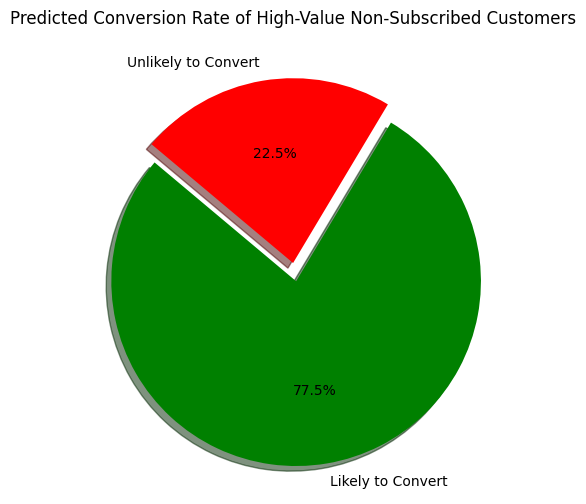

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✅ Load High-Value Non-Subscribed Customers (HVUSC) Data
file_path = r"C:\Users\aishw\OneDrive\Desktop\Actual_High_Value_Non_Subscribers.xlsx"
hvusc_df = pd.read_excel(file_path)


hvusc_df = hvusc_df.dropna(subset=["Review Rating", "Purchase Amount (USD)", "Numeric Purchase Frequency"])


hvusc_df["Will Convert"] = np.where(hvusc_df["Review Rating"] > 3, 1, 0) 


X = hvusc_df[["Review Rating", "Purchase Amount (USD)", "Numeric Purchase Frequency"]]
y = hvusc_df["Will Convert"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

#  Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# ✅ Calculate Conversion Metrics
total_hvusc = hvusc_df["Customer ID"].nunique()
likely_to_convert = hvusc_df[hvusc_df["Will Convert"] == 1]["Customer ID"].nunique()
conversion_rate = (likely_to_convert / total_hvusc) * 100 if total_hvusc > 0 else 0

print(f"Total High-Value Non-Subscribed Customers: {total_hvusc}")
print(f"Predicted Customers Likely to Convert: {likely_to_convert}")
print(f"Estimated Conversion Rate: {conversion_rate:.2f}%")

labels = ["Likely to Convert", "Unlikely to Convert"]
sizes = [likely_to_convert, total_hvusc - likely_to_convert]
colors = ['green', 'red']
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=140)
plt.title("Predicted Conversion Rate of High-Value Non-Subscribed Customers")
plt.show()


Churn Value Counts:
 Churn
0    3813
1      87
Name: count, dtype: int64
Model Accuracy: 99.10%
Confusion Matrix:
 [[763   0]
 [  7  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       763
           1       1.00      0.59      0.74        17

    accuracy                           0.99       780
   macro avg       1.00      0.79      0.87       780
weighted avg       0.99      0.99      0.99       780



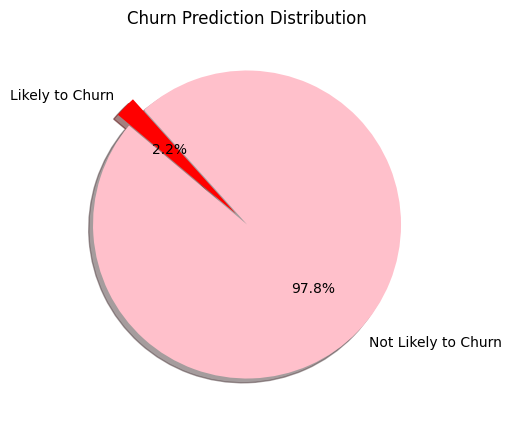

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings("ignore", category=FutureWarning)

file_path = r"C:\Users\aishw\OneDrive\Desktop\shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

def frequency_to_numeric(freq):
    mapping = {"Weekly": 52, "Bi-Weekly": 26, "Fortnightly": 26, 
               "Monthly": 12, "Every 3 Months": 4, "Quarterly": 4, 
               "Annually": 1}
    return mapping.get(freq, 0)

df["Numeric Purchase Frequency"] = df["Frequency of Purchases"].apply(frequency_to_numeric)

df["Subscription Status"] = df["Subscription Status"].str.lower().map({"yes": 1, "no": 0})

df["Churn"] = ((df["Subscription Status"] == 1) & 
                (df["Numeric Purchase Frequency"] < 6) & 
                (df["Review Rating"] < 3)).astype(int)

print("Churn Value Counts:\n", df["Churn"].value_counts())

features = ["Subscription Status", "Numeric Purchase Frequency", "Review Rating"]
X = df[features]
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Train Logistic Regression Model
model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

# ✅ Predictions
y_pred = model.predict(X_test_scaled)

# ✅ Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}%")  # Accuracy Percentage
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

churn_counts = df["Churn"].value_counts()
labels = ["Not Likely to Churn", "Likely to Churn"]
colors = ["pink", "red"]

plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=(0, 0.1), shadow=True)
plt.title("Churn Prediction Distribution")
plt.show()
